In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.pyplot import figure
# import ipykernel
# import sys

In [2]:
class AdalineGD(object):
   '''Adaline Klassificator
      Parameter
      ---------
      eta: float 
         Lernarte (zwischen 0.0 und 1.0)
      n_iter: int
         Durchläufe der Trainingsdatenmenge
      random_state: int
         Initialisierung für Zufallszahlen für allfällige Gewichte
         
      Attribute
      ---------
      w_: 1d-Array
         Gewichtungen nach Anpassungen
      cost_: list
         Summe der quadrierten Werte der Straffunktion pro Epoche
         
   '''
   def __init__(self, eta:float =0.01 , n_iter:int =50 , random_state:int =None):
      self.eta          = eta
      self.n_iter       = n_iter
      self.random_state = random_state
      
   def fit(self, X :np.array, y :np.array) -> object:
      '''Anpassen an die Trainingsdaten
      
         Parameter
         ---------
         X: {array-like}, shape = [n_samples, n_features]
            Trainingsvektoren, n_samples ist die Anzahl der Objekte
            und n_features ist die Anzahl der Merkmale
         y: {array-like}, shape = [n_samples]
            Zielwerte
         
         Rückgabewert
         ------------
         self: object

      '''
      rgen = np.random.RandomState(self.random_state)
      self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
      print()
      print("Initialisierung der Gewichte: ", self.w_)
      print()
      self.cost_ = []

      for _ in range(self.n_iter):
         net_input = self.net_input(X=X)
         output = self.activation(X=net_input)
         errors = (y - output)
         self.w_[1:] += self.eta * X.T.dot(errors)
         self.w_[0]  += self.eta * errors.sum()
         print("Gewichte: ", self.w_)
         cost = (errors**2).sum() / 2.0
         self.cost_.append(cost)
      return self

   def net_input(self, X) -> np.array:
      '''Netzeingabe berechnen'''
      return np.dot(X, self.w_[1:]) + self.w_[0]
   
   def activation(self, X: np.array) -> np.array:
      '''lineare Aktivierungsfunktion berechnen'''
      return X

   def predict(self, X) -> np.array:
      '''Klassenbezeichnung zurückgeben'''
      return np.where(self.net_input(X) >= 0.0, 1, -1)

In [3]:
s = os.path.join('https://archive.ics.uci.edu', 'ml', 'machine-learning-databases', 'iris', 'iris.data')
print('URL: ', s)
df = pd.read_csv('data/iris.data', header=None, encoding='utf-8')
df.head(10)

URL:  https://archive.ics.uci.edu\ml\machine-learning-databases\iris\iris.data


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
# Auswahl von Setosa und Versicolor (50-50)
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)   # setosa = -1 /  versicolor = 1

In [6]:
# Auswahl von Kelch- und Blütenblattlänge
X = df.iloc[:100, [0,2]].values    # die beiden Features oder Merkamle extrahieren

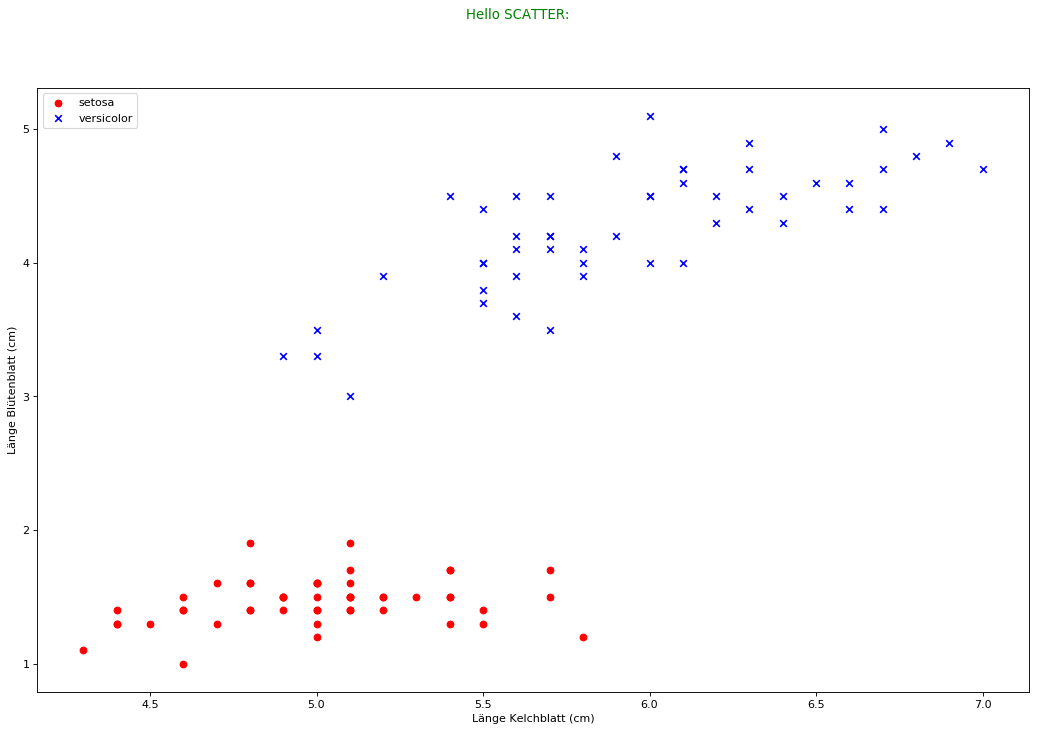

In [7]:
# Ausgbae der Diagramms
figure(figsize=(16, 10), dpi=80)
plt.scatter(X[:50, 0],  X[:50, 1], color='red',  marker='o', label='setosa')  
plt.suptitle("Hello SCATTER:", color="green")
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')   
plt.xlabel('Länge Kelchblatt (cm)')
plt.ylabel('Länge Blütenblatt (cm)')
plt.legend(loc='upper left')
plt.show()


Initialisierung der Gewichte:  [0.00972605 0.01147032 0.02088555]

Gewichte:  [-1.31282034 -2.77708074  9.6961386 ]
Gewichte:  [-113.75401644 -674.45998331 -478.79248162]
Gewichte:  [ 51626.53265895 288730.23825789 162604.36167391]
Gewichte:  [-2.09148070e+07 -1.16811285e+08 -6.53797273e+07]
Gewichte:  [8.45014643e+09 4.71933340e+10 2.64102461e+10]
Gewichte:  [-3.41385986e+12 -1.90660951e+13 -1.06696923e+13]
Gewichte:  [1.37919739e+15 7.70269113e+15 4.31054895e+15]
Gewichte:  [-5.57194919e+17 -3.11188259e+18 -1.74145918e+18]
Gewichte:  [2.25106413e+20 1.25719870e+21 7.03548465e+20]
Gewichte:  [-9.09428556e+22 -5.07907519e+23 -2.84233157e+23]
Gewichte:  [3.67408590e+25 2.05194333e+26 1.14830025e+26]
Gewichte:  [-1.48432850e+28 -8.28983872e+28 -4.63912611e+28]
Gewichte:  [5.99667822e+30 3.34908986e+31 1.87420416e+31]
Gewichte:  [-2.42265440e+33 -1.35303029e+34 -7.57177356e+33]
Gewichte:  [9.78750923e+35 5.46623426e+36 3.05899197e+36]
Gewichte:  [-3.95414785e+38 -2.20835536e+39 -1.235830

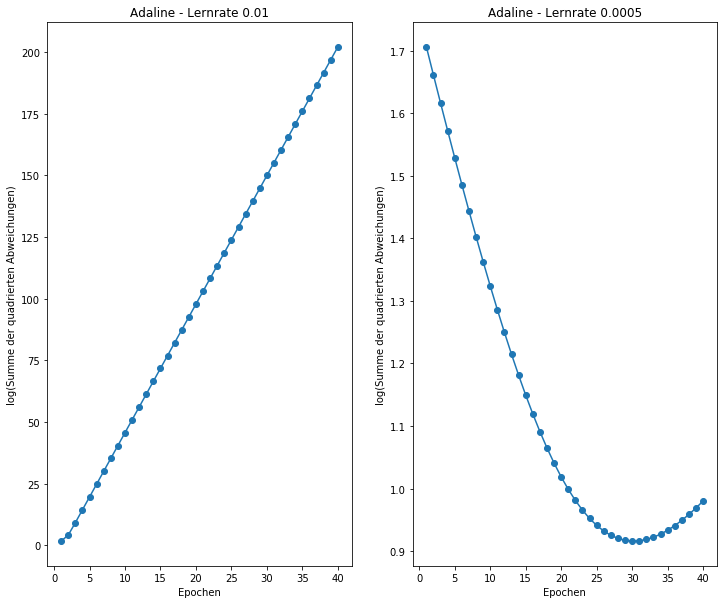

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,10))
ada1 = AdalineGD(eta=0.1, n_iter=40).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochen')
ax[0].set_ylabel('log(Summe der quadrierten Abweichungen)')
ax[0].set_title("Adaline - Lernrate 0.01")

ada2 = AdalineGD(eta=0.0005, n_iter=40).fit(X=X, y=y)
ax[1].plot(range(1, len(ada2.cost_) + 1), np.log10(ada2.cost_), marker='o')
ax[1].set_xlabel('Epochen')
ax[1].set_ylabel('log(Summe der quadrierten Abweichungen)')
ax[1].set_title("Adaline - Lernrate 0.0005")
plt.show()

### ELÄUTERUNGEN ZUM GRADIENABSTIEG IM GRAPHEN OBERHALB
`[1]` Wie man dem linken Graphen entnehmen kann, wurden die Schritte zu groß gewählt, sodass man über das Ziel des gobalen Minimum hinausschießt, und 
der Fehler wieder wächst<br>
`[2]`Der rechte Graph zeigt, was passiert, wenn die Schritte zu klein sind: es dauert sehr lange, bis man das globale Minimum des Fehlers erreicht und 
eine Konvergenz stattfindet<br>
#### Wir sollten also Merkmalsstandardisierung einsetzen, um ein besseres Ergebnis zu erzielen
[...] das ist im Übrigen für viele Algorithmen der Fall! Wir werden also eine Standardiersierung auf die Daten anwenden -> d.h. die Werte vom Mittelwert
abziehen und durch die Standardabweichung dividieren. Somit erhalten wir eine Standard-Normalverteilung


In [21]:
# Hier standardisieren wir die Features (Merkmale) entsprechend 
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

In [22]:
# unseren Algorithmus erneut trainieren
ada_gd = AdalineGD(eta=0.01, n_iter=15).fit(X=X_std, y=y)


Initialisierung der Gewichte:  [-0.01169465 -0.0032244  -0.00307952]

Gewichte:  [-2.77555756e-17  7.30791921e-01  9.72574740e-01]
Gewichte:  [ 1.44884105e-15 -6.18190805e-02  3.76267795e-01]
Gewichte:  [3.33066907e-17 4.22614250e-01 1.02017642e+00]
Gewichte:  [ 1.06581410e-15 -1.00490176e-01  6.26628012e-01]
Gewichte:  [6.32827124e-17 2.19224311e-01 1.05159241e+00]
Gewichte:  [ 7.64943664e-16 -1.26012179e-01  7.91859805e-01]
Gewichte:  [8.77076189e-17 8.49917838e-02 1.07232621e+00]
Gewichte:  [ 5.88418203e-16 -1.42856095e-01  9.00908862e-01]
Gewichte:  [ 1.42108547e-16 -3.59849394e-03  1.08601002e+00]
Gewichte:  [ 3.46389584e-16 -1.53972680e-01  9.72878648e-01]
Gewichte:  [ 1.19904087e-16 -6.20659720e-02  1.09504101e+00]
Gewichte:  [ 2.53130850e-16 -1.61309361e-01  1.02037700e+00]
Gewichte:  [ 1.60982339e-16 -1.00653118e-01  1.10100126e+00]
Gewichte:  [ 2.55351296e-16 -1.66151397e-01  1.05172478e+00]
Gewichte:  [ 1.64313008e-16 -1.26119718e-01  1.10493487e+00]


In [23]:
def plot_decision_regions(X, y, classifier, resolution=.01):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('hotpink', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - .3, X[:, 0].max() + .3
    x2_min, x2_max = X[:, 1].min() - .3, X[:, 1].max() + .3

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    print("Shape xx1: ", xx1.shape, "  /  Type: ", type(xx1))
    print("Shape xx2: ", xx2.shape, "  /  Type: ", type(xx2))
    print("Flatten, für die Verwendung in PREDICT Classifier: ", xx1.ravel().shape)
    print("np.array Transpose: ", np.array([xx1.ravel()]).T)
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    print("Z-shape: ", Z.shape, "  /  Type: ", type(Z))
    Z = Z.reshape(xx1.shape)
    print("Re-Shaped: ", Z.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

Shape xx1:  (345, 483)   /  Type:  <class 'numpy.ndarray'>
Shape xx2:  (345, 483)   /  Type:  <class 'numpy.ndarray'>
Flatten, für die Verwendung in PREDICT Classifier:  (166635,)
np.array Transpose:  [[-2.1340382]
 [-2.1240382]
 [-2.1140382]
 ...
 [ 2.6659618]
 [ 2.6759618]
 [ 2.6859618]]
Z-shape:  (166635,)   /  Type:  <class 'numpy.ndarray'>
Re-Shaped:  (345, 483)


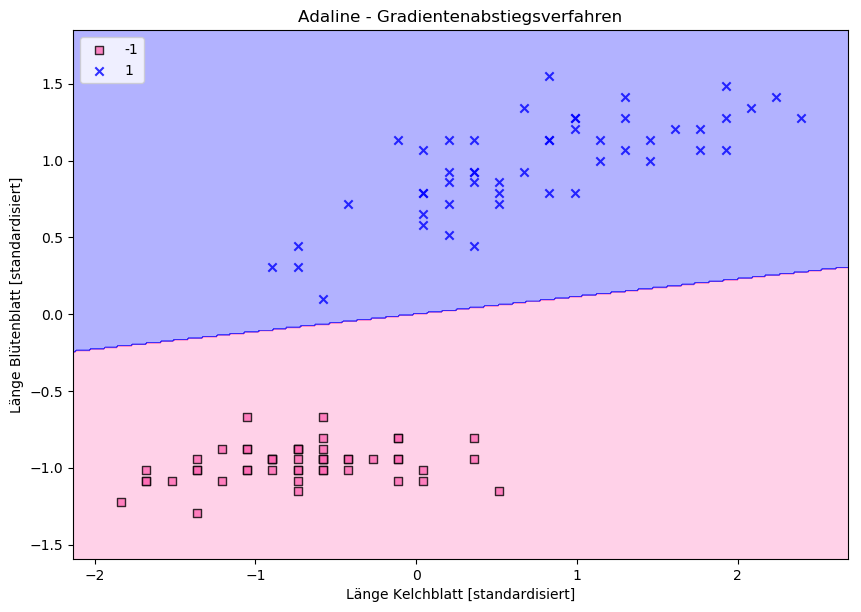

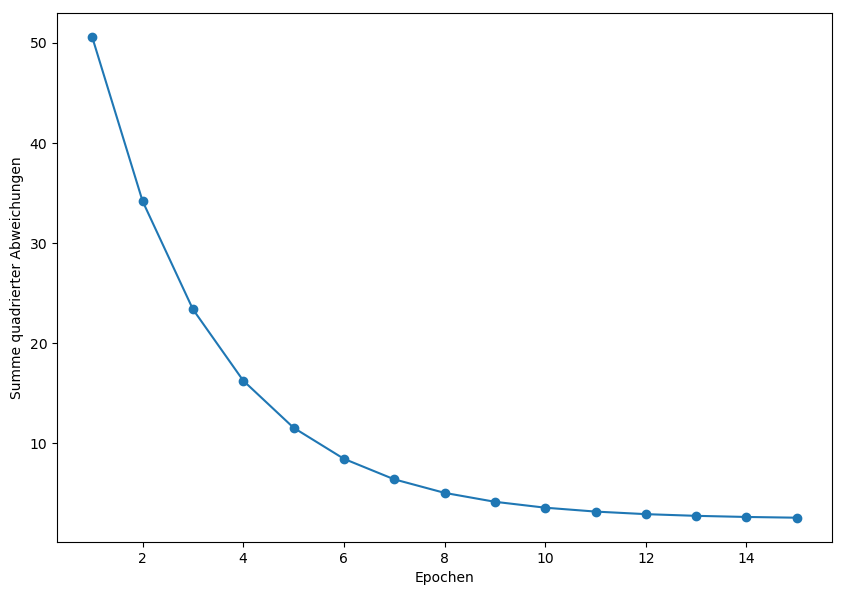

In [25]:
figure(figsize=(10, 7), dpi=100)
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title("Adaline - Gradientenabstiegsverfahren")
plt.xlabel('Länge Kelchblatt [standardisiert]')
plt.ylabel('Länge Blütenblatt [standardisiert]')
plt.legend(loc='upper left')
plt.show()   

figure(figsize=(10, 7), dpi=100)
plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
plt.xlabel("Epochen")
plt.ylabel("Summe quadrierter Abweichungen")
plt.show()

### Abbildung oben zeigt nun deutliche Verbesserung mittels standardisierten Merkmalen beim Gradientenabstieg